<a href="https://colab.research.google.com/github/shumshersubashgautam/Yolo_Classification_Autism/blob/main/Autism_Validation_testing_yolov8_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Mar 26 05:50:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 7359, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 7359 (delta 199), reused 222 (delta 135), pack-reused 7024
Receiving objects: 100% (7359/7359), 5.04 MiB | 26.48 MiB/s, done.
Resolving deltas: 100% (5086/5086), done.


In [3]:
cd ultralytics

/content/ultralytics


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 21.5 MB/s eta 0:00:00


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
!cp /content/gdrive/MyDrive/autism.zip /content/ultralytics/

In [14]:
!cp /content/gdrive/MyDrive/optimizeRA.zip  /content/ultralytics/

Testing and validation With SGD Weights.

In [16]:
!ls -la /content/ultralytics/Optimizers/SGD-375

total 22924
drwxr-xr-x 2 root root     4096 Mar 24 16:59 .
drwxr-xr-x 4 root root     4096 Mar 24 18:14 ..
-rw-r--r-- 1 root root     1396 Mar 24 16:55 args.yaml
-rw-r--r-- 1 root root 11691637 Mar 24 16:57 best.pt
-rw-r--r-- 1 root root 11691637 Mar 24 16:59 last.pt
-rw-r--r-- 1 root root    72000 Mar 24 16:54 results.csv


In [17]:
!cat /content/ultralytics/Optimizers/SGD-375/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                0.17281,                0.48214,                      1,                 0.6125,               0.067199,             0.00033133,             0.00033133
                      1,                0.17223,                0.51429,                      1,                0.60483,               0.034197,             0.00066334,             0.00066334
                      2,                0.17163,                0.58929,                      1,                0.60161,              0.0011948,             0.00099404,             0.00099404
                      3,                0.16781,                0.73214,                      1,                0.56643,             0.00099406,             0.00099406,             0.00099406
                      4,                

In [18]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [19]:
!yolo task=classify mode=val model=/content/ultralytics/Optimizers/SGD-375/best.pt data=/content/ultralytics/autism/  conf=0.5 plots= True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100% 18/18 [00:00<00:00, 25.98it/s]
                   all      0.893          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/ultralytics/runs/classify/val


In [20]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/SGD-375/best.pt conf=0.25 source=./autism/test/Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

100% 755k/755k [00:00<00:00, 18.2MB/s]
image 1/140 /content/ultralytics/autism/test/Autistic/001.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 4.1ms
image 2/140 /content/ultralytics/autism/test/Autistic/002.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 6.6ms
image 3/140 /content/ultralytics/autism/test/Autistic/003.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 3.5ms
image 4/140 /content/ultralytics/autism/test/Autistic/004.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 3.3ms
image 5/140 /content/ultralytics/autism/test/Autistic/005.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.2ms
image 6/140 /content/ultralytics/autism/test/Autistic/006.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.2ms
image 7/140 /content/ultralytics/autism/test/Autistic/007.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 3.4ms
image 8/140 

In [21]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/SGD-375/best.pt conf=0.25 source=./autism/test/Non_Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Non_Autistic/001.jpg: 128x128 Non_Autistic 0.84, Autistic 0.16, 3.5ms
image 2/140 /content/ultralytics/autism/test/Non_Autistic/002.jpg: 128x128 Non_Autistic 0.91, Autistic 0.09, 5.3ms
image 3/140 /content/ultralytics/autism/test/Non_Autistic/003.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 3.3ms
image 4/140 /content/ultralytics/autism/test/Non_Autistic/004.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.5ms
image 5/140 /content/ultralytics/autism/test/Non_Autistic/005.jpg: 128x128 Non_Autistic 0.91, Autistic 0.09, 3.3ms
image 6/140 /content/ultralytics/autism/test/Non_Autistic/006.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.5ms
image 7/140 /content/ultralytics/autism/test/Non_Autistic/007.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.6ms
image 8/140 /content/ul

In [22]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/SGD-375/best.pt conf=0.25 source=./autism/valid/Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Autistic/01.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 3.3ms
image 2/40 /content/ultralytics/autism/valid/Autistic/02.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 5.6ms
image 3/40 /content/ultralytics/autism/valid/Autistic/03.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 3.5ms
image 4/40 /content/ultralytics/autism/valid/Autistic/04.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 3.2ms
image 5/40 /content/ultralytics/autism/valid/Autistic/05.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.1ms
image 6/40 /content/ultralytics/autism/valid/Autistic/06.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.2ms
image 7/40 /content/ultralytics/autism/valid/Autistic/07.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 3.1ms
image 8/40 /content/ultralytics/autism/valid/Autistic/08.j

In [23]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/SGD-375/best.pt conf=0.25 source=./autism/valid/Non_Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Non_Autistic/01.jpg: 128x128 Non_Autistic 0.84, Autistic 0.16, 3.3ms
image 2/40 /content/ultralytics/autism/valid/Non_Autistic/02.jpg: 128x128 Non_Autistic 0.91, Autistic 0.09, 4.9ms
image 3/40 /content/ultralytics/autism/valid/Non_Autistic/03.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 3.1ms
image 4/40 /content/ultralytics/autism/valid/Non_Autistic/04.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.2ms
image 5/40 /content/ultralytics/autism/valid/Non_Autistic/05.jpg: 128x128 Non_Autistic 0.91, Autistic 0.09, 3.2ms
image 6/40 /content/ultralytics/autism/valid/Non_Autistic/06.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.5ms
image 7/40 /content/ultralytics/autism/valid/Non_Autistic/07.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.5ms
image 8/40 /content/ultralytic

In [33]:
cd ..

/content/ultralytics


In [34]:
!python setup.py install

running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating ultralytics.egg-info
writing ultralytics.egg-info/PKG-INFO
writing dependency_links to ultralytics.egg-info/dependency_links.txt
writing entry points to ultralytics.egg-info/entry_points.txt
writing requirements to ultralytics.egg-info/requires.txt
writing top-level names to ultralytics.egg-info/top_level.txt
writing manifest file 'ultralytics.egg-info/SOURCES.txt'
reading manifest file 'ultralytics.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'ultra

In [37]:
cd ultralytics


/content/ultralytics/ultralytics


In [41]:
cd ..

/content/ultralytics


In [51]:
# Ultralytics YOLO 🚀, GPL-3.0 license

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

from ultralytics.yolo.utils import LOGGER, TryExcept, threaded

# from .checks import check_font, check_version, is_ascii
# from .files import increment_path
# from .ops import clip_coords, scale_image, xywh2xyxy, xyxy2xywh

matplotlib.rc('font', **{'size': 11})
matplotlib.use('Agg')  # for writing to files only


class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'


class Annotator:
    # YOLOv8 Annotator for train/val mosaics and jpgs and detect/hub inference annotations
    def __init__(self, im, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        non_ascii = not is_ascii(example)  # non-latin labels, i.e. asian, arabic, cyrillic
        self.pil = pil or non_ascii
        if self.pil:  # use PIL
            self.pil_9_2_0_check = check_version(pil_version, '9.2.0')  # deprecation check
            self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
            self.draw = ImageDraw.Draw(self.im)
            try:
                font = check_font('Arial.Unicode.ttf' if non_ascii else font)
                size = font_size or max(round(sum(self.im.size) / 2 * 0.035), 12)
                self.font = ImageFont.truetype(str(font), size)
            except Exception:
                self.font = ImageFont.load_default()
        else:  # use cv2
            self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        if isinstance(box, torch.Tensor):
            box = box.tolist()
        if self.pil or not is_ascii(label):
            self.draw.rectangle(box, width=self.lw, outline=color)  # box
            if label:
                if self.pil_9_2_0_check:
                    _, _, w, h = self.font.getbbox(label)  # text width, height (New)
                else:
                    w, h = self.font.getsize(label)  # text width, height (Old, deprecated in 9.2.0)
                outside = box[1] - h >= 0  # label fits outside box
                self.draw.rectangle(
                    (box[0], box[1] - h if outside else box[1], box[0] + w + 1,
                     box[1] + 1 if outside else box[1] + h + 1),
                    fill=color,
                )
                # self.draw.text((box[0], box[1]), label, fill=txt_color, font=self.font, anchor='ls')  # for PIL>8.0
                self.draw.text((box[0], box[1] - h if outside else box[1]), label, fill=txt_color, font=self.font)
        else:  # cv2
            p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
            cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
            if label:
                tf = max(self.lw - 1, 1)  # font thickness
                w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
                outside = p1[1] - h >= 3
                p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
                cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(self.im,
                            label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                            0,
                            self.lw / 3,
                            txt_color,
                            thickness=tf,
                            lineType=cv2.LINE_AA)

    def masks(self, masks, colors, im_gpu, alpha=0.5, retina_masks=False):
        """Plot masks at once.
        Args:
            masks (tensor): predicted masks on cuda, shape: [n, h, w]
            colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
            im_gpu (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
            alpha (float): mask transparency: 0.0 fully transparent, 1.0 opaque
        """
        if self.pil:
            # convert to numpy first
            self.im = np.asarray(self.im).copy()
        if len(masks) == 0:
            self.im[:] = im_gpu.permute(1, 2, 0).contiguous().cpu().numpy() * 255
        if im_gpu.device != masks.device:
            im_gpu = im_gpu.to(masks.device)
        colors = torch.tensor(colors, device=masks.device, dtype=torch.float32) / 255.0
        colors = colors[:, None, None]  # shape(n,1,1,3)
        masks = masks.unsqueeze(3)  # shape(n,h,w,1)
        masks_color = masks * (colors * alpha)  # shape(n,h,w,3)

        inv_alph_masks = (1 - masks * alpha).cumprod(0)  # shape(n,h,w,1)
        mcs = (masks_color * inv_alph_masks).sum(0) * 2  # mask color summand shape(n,h,w,3)

        im_gpu = im_gpu.flip(dims=[0])  # flip channel
        im_gpu = im_gpu.permute(1, 2, 0).contiguous()  # shape(h,w,3)
        im_gpu = im_gpu * inv_alph_masks[-1] + mcs
        im_mask = (im_gpu * 255)
        im_mask_np = im_mask.byte().cpu().numpy()
        self.im[:] = im_mask_np if retina_masks else scale_image(im_gpu.shape, im_mask_np, self.im.shape)
        if self.pil:
            # convert im back to PIL and update draw
            self.fromarray(self.im)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255), anchor='top'):
        # Add text to image (PIL-only)
        if anchor == 'bottom':  # start y from font bottom
            w, h = self.font.getsize(text)  # text width, height
            xy[1] += 1 - h
        if self.pil:
            self.draw.text(xy, text, fill=txt_color, font=self.font)
        else:
            tf = max(self.lw - 1, 1)  # font thickness
            cv2.putText(self.im, text, xy, 0, self.lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

    def fromarray(self, im):
        # Update self.im from a numpy array
        self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
        self.draw = ImageDraw.Draw(self.im)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)


@TryExcept()  # known issue https://github.com/ultralytics/yolov5/issues/5395
def plot_labels(boxes, cls, names=(), save_dir=Path('')):
    import pandas as pd
    import seaborn as sn

    # plot dataset labels
    LOGGER.info(f"Plotting labels to {save_dir / 'labels.jpg'}... ")
    b = boxes.transpose()  # classes, boxes
    nc = int(cls.max() + 1)  # number of classes
    x = pd.DataFrame(b.transpose(), columns=['x', 'y', 'width', 'height'])

    # seaborn correlogram
    sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))
    plt.savefig(save_dir / 'labels_correlogram.jpg', dpi=200)
    plt.close()

    # matplotlib labels
    matplotlib.use('svg')  # faster
    ax = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)[1].ravel()
    y = ax[0].hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
    with contextlib.suppress(Exception):  # color histogram bars by class
        [y[2].patches[i].set_color([x / 255 for x in colors(i)]) for i in range(nc)]  # known issue #3195
    ax[0].set_ylabel('instances')
    if 0 < len(names) < 30:
        ax[0].set_xticks(range(len(names)))
        ax[0].set_xticklabels(list(names.values()), rotation=90, fontsize=10)
    else:
        ax[0].set_xlabel('classes')
    sn.histplot(x, x='x', y='y', ax=ax[2], bins=50, pmax=0.9)
    sn.histplot(x, x='width', y='height', ax=ax[3], bins=50, pmax=0.9)

    # rectangles
    boxes[:, 0:2] = 0.5  # center
    boxes = xywh2xyxy(boxes) * 2000
    img = Image.fromarray(np.ones((2000, 2000, 3), dtype=np.uint8) * 255)
    for cls, box in zip(cls[:1000], boxes[:1000]):
        ImageDraw.Draw(img).rectangle(box, width=1, outline=colors(cls))  # plot
    ax[1].imshow(img)
    ax[1].axis('off')

    for a in [0, 1, 2, 3]:
        for s in ['top', 'right', 'left', 'bottom']:
            ax[a].spines[s].set_visible(False)

    plt.savefig(save_dir / 'labels.jpg', dpi=200)
    matplotlib.use('Agg')
    plt.close()


def save_one_box(xyxy, im, file=Path('im.jpg'), gain=1.02, pad=10, square=False, BGR=False, save=True):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels. Save and/or return crop
    b = xyxy2xywh(xyxy.view(-1, 4))  # boxes
    if square:
        b[:, 2:] = b[:, 2:].max(1)[0].unsqueeze(1)  # attempt rectangle to square
    b[:, 2:] = b[:, 2:] * gain + pad  # box wh * gain + pad
    xyxy = xywh2xyxy(b).long()
    clip_coords(xyxy, im.shape)
    crop = im[int(xyxy[0, 1]):int(xyxy[0, 3]), int(xyxy[0, 0]):int(xyxy[0, 2]), ::(1 if BGR else -1)]
    if save:
        file.parent.mkdir(parents=True, exist_ok=True)  # make directory
        f = str(increment_path(file).with_suffix('.jpg'))
        # cv2.imwrite(f, crop)  # save BGR, https://github.com/ultralytics/yolov5/issues/7007 chroma subsampling issue
        Image.fromarray(crop[..., ::-1]).save(f, quality=95, subsampling=0)  # save RGB
    return crop


@threaded
def plot_images(images,
                batch_idx,
                cls,
                bboxes,
                masks=np.zeros(0, dtype=np.uint8),
                paths=None,
                fname='images.jpg',
                names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(cls, torch.Tensor):
        cls = cls.cpu().numpy()
    if isinstance(bboxes, torch.Tensor):
        bboxes = bboxes.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)
    if isinstance(batch_idx, torch.Tensor):
        batch_idx = batch_idx.cpu().numpy()

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(cls) > 0:
            idx = batch_idx == i

            boxes = xywh2xyxy(bboxes[idx, :4]).T
            classes = cls[idx].astype('int')
            labels = bboxes.shape[1] == 4  # labels if no conf column
            conf = None if labels else bboxes[idx, 4]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                c = classes[j]
                color = colors(c)
                c = names[c] if names else c
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{c}' if labels else f'{c} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if idx.shape[0] == masks.shape[0]:  # overlap_masks=False
                    image_masks = masks[idx]
                else:  # overlap_masks=True
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = idx.sum()
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(bool)
                        else:
                            mask = image_masks[j].astype(bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results(file='path/to/results.csv', dir='', segment=False):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    import pandas as pd
    save_dir = Path(file).parent if file else Path(dir)
    if segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()


def output_to_target(output, max_det=300):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf] for plotting
    targets = []
    for i, o in enumerate(output):
        box, conf, cls = o[:max_det, :6].cpu().split((4, 1, 1), 1)
        j = torch.full((conf.shape[0], 1), i)
        targets.append(torch.cat((j, cls, xyxy2xywh(box), conf), 1))
    targets = torch.cat(targets, 0).numpy()
    return targets[:, 0], targets[:, 1], targets[:, 2:]

In [52]:
plot_results('/content/ultralytics/Optimizers/SGD-375/results.csv')

In [47]:
from IPython.display import display, Image

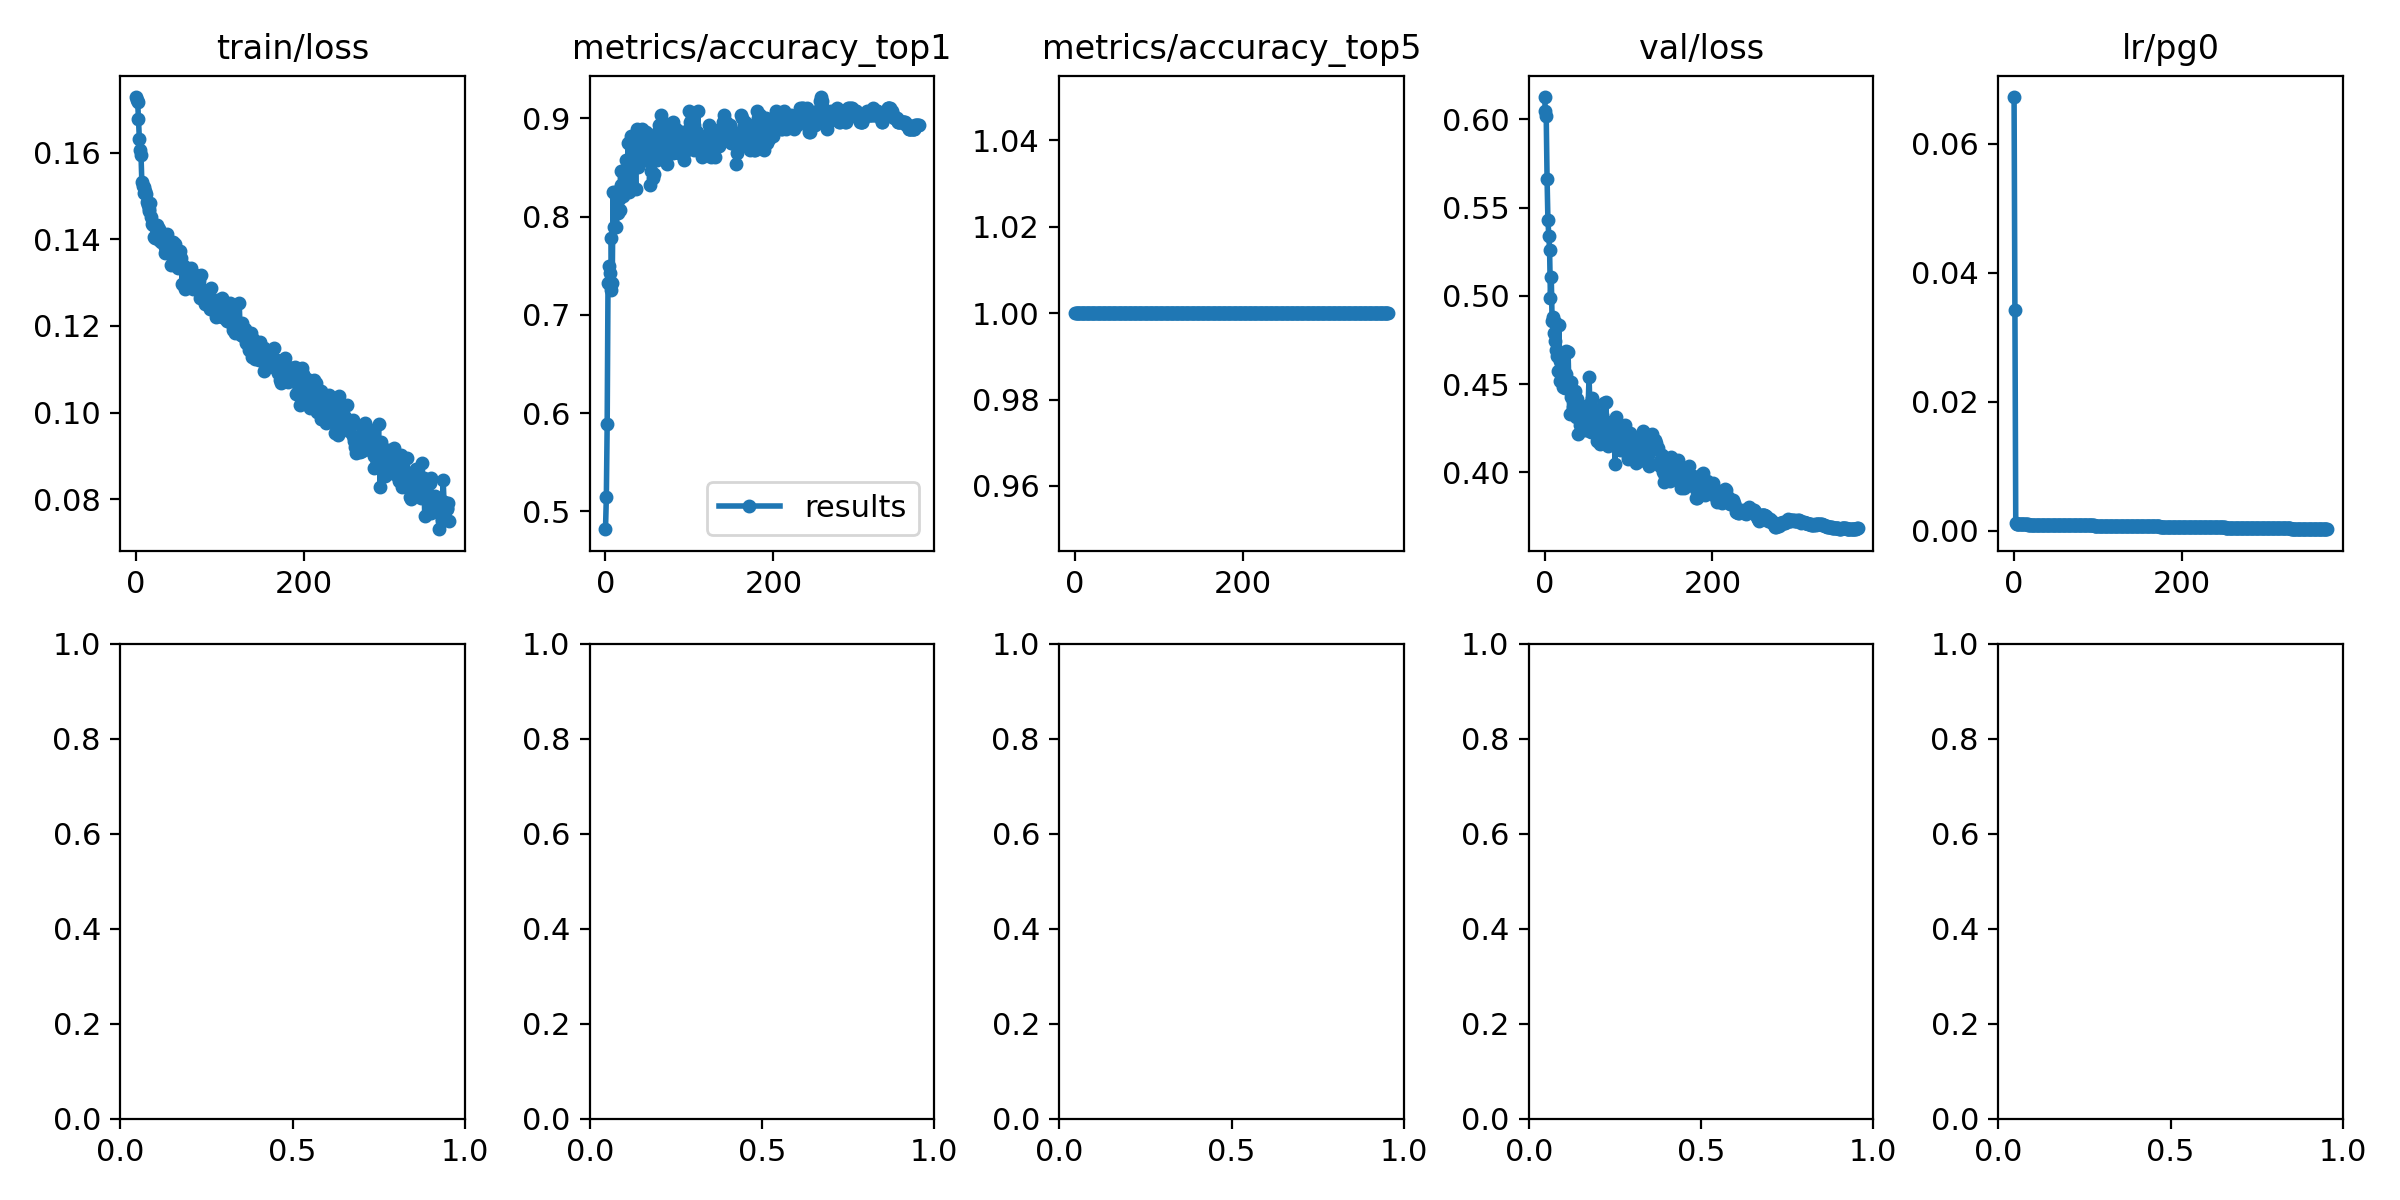

In [48]:
Image(filename=f'/content/ultralytics/Optimizers/SGD-375/results.png', height=800)

Testing and validation ADAM optimizer

In [53]:
!yolo task=classify mode=val model=/content/ultralytics/optimizeRA/Adam/adam500best.pt data=/content/ultralytics/autism/  conf=0.5 plots= True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100% 18/18 [00:00<00:00, 25.73it/s]
                   all      0.882          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/ultralytics/runs/classify/val2


In [54]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Adam/adam500best.pt conf=0.25 source=./autism/test/Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Autistic/001.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 3.4ms
image 2/140 /content/ultralytics/autism/test/Autistic/002.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 4.9ms
image 3/140 /content/ultralytics/autism/test/Autistic/003.jpg: 128x128 Autistic 0.96, Non_Autistic 0.04, 4.3ms
image 4/140 /content/ultralytics/autism/test/Autistic/004.jpg: 128x128 Autistic 0.88, Non_Autistic 0.12, 3.2ms
image 5/140 /content/ultralytics/autism/test/Autistic/005.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 3.2ms
image 6/140 /content/ultralytics/autism/test/Autistic/006.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 3.2ms
image 7/140 /content/ultralytics/autism/test/Autistic/007.jpg: 128x128 Autistic 0.94, Non_Autistic 0.06, 3.2ms
image 8/140 /content/ultralytics/autism/test/Autist

In [57]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Adam/adam500best.pt conf=0.25 source=./autism/test/Non_Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Non_Autistic/001.jpg: 128x128 Non_Autistic 0.90, Autistic 0.10, 7.7ms
image 2/140 /content/ultralytics/autism/test/Non_Autistic/002.jpg: 128x128 Non_Autistic 0.77, Autistic 0.23, 5.5ms
image 3/140 /content/ultralytics/autism/test/Non_Autistic/003.jpg: 128x128 Non_Autistic 0.95, Autistic 0.05, 4.4ms
image 4/140 /content/ultralytics/autism/test/Non_Autistic/004.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 4.5ms
image 5/140 /content/ultralytics/autism/test/Non_Autistic/005.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 4.2ms
image 6/140 /content/ultralytics/autism/test/Non_Autistic/006.jpg: 128x128 Non_Autistic 0.97, Autistic 0.03, 4.3ms
image 7/140 /content/ultralytics/autism/test/Non_Autistic/007.jpg: 128x128 Non_Autistic 0.65, Autistic 0.35, 4.6ms
image 8/140 /content/ul

In [58]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Adam/adam500best.pt conf=0.25 source=./autism/valid/Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Autistic/01.jpg: 128x128 Autistic 0.79, Non_Autistic 0.21, 4.2ms
image 2/40 /content/ultralytics/autism/valid/Autistic/02.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 4.5ms
image 3/40 /content/ultralytics/autism/valid/Autistic/03.jpg: 128x128 Autistic 0.96, Non_Autistic 0.04, 4.2ms
image 4/40 /content/ultralytics/autism/valid/Autistic/04.jpg: 128x128 Autistic 0.88, Non_Autistic 0.12, 4.5ms
image 5/40 /content/ultralytics/autism/valid/Autistic/05.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 4.5ms
image 6/40 /content/ultralytics/autism/valid/Autistic/06.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 5.2ms
image 7/40 /content/ultralytics/autism/valid/Autistic/07.jpg: 128x128 Autistic 0.94, Non_Autistic 0.06, 5.3ms
image 8/40 /content/ultralytics/autism/valid/Autistic/08.j

In [59]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Adam/adam500best.pt conf=0.25 source=./autism/valid/Non_Autistic/  plots=True save= True save_hybrid = True save_json = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Non_Autistic/01.jpg: 128x128 Non_Autistic 0.90, Autistic 0.10, 3.5ms
image 2/40 /content/ultralytics/autism/valid/Non_Autistic/02.jpg: 128x128 Non_Autistic 0.77, Autistic 0.23, 3.6ms
image 3/40 /content/ultralytics/autism/valid/Non_Autistic/03.jpg: 128x128 Non_Autistic 0.95, Autistic 0.05, 5.4ms
image 4/40 /content/ultralytics/autism/valid/Non_Autistic/04.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 3.3ms
image 5/40 /content/ultralytics/autism/valid/Non_Autistic/05.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 3.5ms
image 6/40 /content/ultralytics/autism/valid/Non_Autistic/06.jpg: 128x128 Non_Autistic 0.97, Autistic 0.03, 3.6ms
image 7/40 /content/ultralytics/autism/valid/Non_Autistic/07.jpg: 128x128 Non_Autistic 0.65, Autistic 0.35, 4.1ms
image 8/40 /content/ultralytic

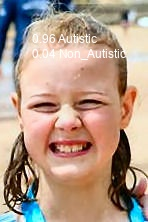

In [69]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/runs/classify/predict7/03.jpg', height=400)

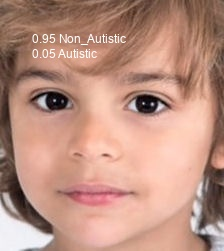

In [68]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/runs/classify/predict8/03.jpg', height=400)

In [60]:
# Ultralytics YOLO 🚀, GPL-3.0 license

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

from ultralytics.yolo.utils import LOGGER, TryExcept, threaded

# from .checks import check_font, check_version, is_ascii
# from .files import increment_path
# from .ops import clip_coords, scale_image, xywh2xyxy, xyxy2xywh

matplotlib.rc('font', **{'size': 11})
matplotlib.use('Agg')  # for writing to files only


class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'


class Annotator:
    # YOLOv8 Annotator for train/val mosaics and jpgs and detect/hub inference annotations
    def __init__(self, im, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        non_ascii = not is_ascii(example)  # non-latin labels, i.e. asian, arabic, cyrillic
        self.pil = pil or non_ascii
        if self.pil:  # use PIL
            self.pil_9_2_0_check = check_version(pil_version, '9.2.0')  # deprecation check
            self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
            self.draw = ImageDraw.Draw(self.im)
            try:
                font = check_font('Arial.Unicode.ttf' if non_ascii else font)
                size = font_size or max(round(sum(self.im.size) / 2 * 0.035), 12)
                self.font = ImageFont.truetype(str(font), size)
            except Exception:
                self.font = ImageFont.load_default()
        else:  # use cv2
            self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        if isinstance(box, torch.Tensor):
            box = box.tolist()
        if self.pil or not is_ascii(label):
            self.draw.rectangle(box, width=self.lw, outline=color)  # box
            if label:
                if self.pil_9_2_0_check:
                    _, _, w, h = self.font.getbbox(label)  # text width, height (New)
                else:
                    w, h = self.font.getsize(label)  # text width, height (Old, deprecated in 9.2.0)
                outside = box[1] - h >= 0  # label fits outside box
                self.draw.rectangle(
                    (box[0], box[1] - h if outside else box[1], box[0] + w + 1,
                     box[1] + 1 if outside else box[1] + h + 1),
                    fill=color,
                )
                # self.draw.text((box[0], box[1]), label, fill=txt_color, font=self.font, anchor='ls')  # for PIL>8.0
                self.draw.text((box[0], box[1] - h if outside else box[1]), label, fill=txt_color, font=self.font)
        else:  # cv2
            p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
            cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
            if label:
                tf = max(self.lw - 1, 1)  # font thickness
                w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
                outside = p1[1] - h >= 3
                p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
                cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(self.im,
                            label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                            0,
                            self.lw / 3,
                            txt_color,
                            thickness=tf,
                            lineType=cv2.LINE_AA)

    def masks(self, masks, colors, im_gpu, alpha=0.5, retina_masks=False):
        """Plot masks at once.
        Args:
            masks (tensor): predicted masks on cuda, shape: [n, h, w]
            colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
            im_gpu (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
            alpha (float): mask transparency: 0.0 fully transparent, 1.0 opaque
        """
        if self.pil:
            # convert to numpy first
            self.im = np.asarray(self.im).copy()
        if len(masks) == 0:
            self.im[:] = im_gpu.permute(1, 2, 0).contiguous().cpu().numpy() * 255
        if im_gpu.device != masks.device:
            im_gpu = im_gpu.to(masks.device)
        colors = torch.tensor(colors, device=masks.device, dtype=torch.float32) / 255.0
        colors = colors[:, None, None]  # shape(n,1,1,3)
        masks = masks.unsqueeze(3)  # shape(n,h,w,1)
        masks_color = masks * (colors * alpha)  # shape(n,h,w,3)

        inv_alph_masks = (1 - masks * alpha).cumprod(0)  # shape(n,h,w,1)
        mcs = (masks_color * inv_alph_masks).sum(0) * 2  # mask color summand shape(n,h,w,3)

        im_gpu = im_gpu.flip(dims=[0])  # flip channel
        im_gpu = im_gpu.permute(1, 2, 0).contiguous()  # shape(h,w,3)
        im_gpu = im_gpu * inv_alph_masks[-1] + mcs
        im_mask = (im_gpu * 255)
        im_mask_np = im_mask.byte().cpu().numpy()
        self.im[:] = im_mask_np if retina_masks else scale_image(im_gpu.shape, im_mask_np, self.im.shape)
        if self.pil:
            # convert im back to PIL and update draw
            self.fromarray(self.im)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255), anchor='top'):
        # Add text to image (PIL-only)
        if anchor == 'bottom':  # start y from font bottom
            w, h = self.font.getsize(text)  # text width, height
            xy[1] += 1 - h
        if self.pil:
            self.draw.text(xy, text, fill=txt_color, font=self.font)
        else:
            tf = max(self.lw - 1, 1)  # font thickness
            cv2.putText(self.im, text, xy, 0, self.lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

    def fromarray(self, im):
        # Update self.im from a numpy array
        self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
        self.draw = ImageDraw.Draw(self.im)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)


@TryExcept()  # known issue https://github.com/ultralytics/yolov5/issues/5395
def plot_labels(boxes, cls, names=(), save_dir=Path('')):
    import pandas as pd
    import seaborn as sn

    # plot dataset labels
    LOGGER.info(f"Plotting labels to {save_dir / 'labels.jpg'}... ")
    b = boxes.transpose()  # classes, boxes
    nc = int(cls.max() + 1)  # number of classes
    x = pd.DataFrame(b.transpose(), columns=['x', 'y', 'width', 'height'])

    # seaborn correlogram
    sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))
    plt.savefig(save_dir / 'labels_correlogram.jpg', dpi=200)
    plt.close()

    # matplotlib labels
    matplotlib.use('svg')  # faster
    ax = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)[1].ravel()
    y = ax[0].hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
    with contextlib.suppress(Exception):  # color histogram bars by class
        [y[2].patches[i].set_color([x / 255 for x in colors(i)]) for i in range(nc)]  # known issue #3195
    ax[0].set_ylabel('instances')
    if 0 < len(names) < 30:
        ax[0].set_xticks(range(len(names)))
        ax[0].set_xticklabels(list(names.values()), rotation=90, fontsize=10)
    else:
        ax[0].set_xlabel('classes')
    sn.histplot(x, x='x', y='y', ax=ax[2], bins=50, pmax=0.9)
    sn.histplot(x, x='width', y='height', ax=ax[3], bins=50, pmax=0.9)

    # rectangles
    boxes[:, 0:2] = 0.5  # center
    boxes = xywh2xyxy(boxes) * 2000
    img = Image.fromarray(np.ones((2000, 2000, 3), dtype=np.uint8) * 255)
    for cls, box in zip(cls[:1000], boxes[:1000]):
        ImageDraw.Draw(img).rectangle(box, width=1, outline=colors(cls))  # plot
    ax[1].imshow(img)
    ax[1].axis('off')

    for a in [0, 1, 2, 3]:
        for s in ['top', 'right', 'left', 'bottom']:
            ax[a].spines[s].set_visible(False)

    plt.savefig(save_dir / 'labels.jpg', dpi=200)
    matplotlib.use('Agg')
    plt.close()


def save_one_box(xyxy, im, file=Path('im.jpg'), gain=1.02, pad=10, square=False, BGR=False, save=True):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels. Save and/or return crop
    b = xyxy2xywh(xyxy.view(-1, 4))  # boxes
    if square:
        b[:, 2:] = b[:, 2:].max(1)[0].unsqueeze(1)  # attempt rectangle to square
    b[:, 2:] = b[:, 2:] * gain + pad  # box wh * gain + pad
    xyxy = xywh2xyxy(b).long()
    clip_coords(xyxy, im.shape)
    crop = im[int(xyxy[0, 1]):int(xyxy[0, 3]), int(xyxy[0, 0]):int(xyxy[0, 2]), ::(1 if BGR else -1)]
    if save:
        file.parent.mkdir(parents=True, exist_ok=True)  # make directory
        f = str(increment_path(file).with_suffix('.jpg'))
        # cv2.imwrite(f, crop)  # save BGR, https://github.com/ultralytics/yolov5/issues/7007 chroma subsampling issue
        Image.fromarray(crop[..., ::-1]).save(f, quality=95, subsampling=0)  # save RGB
    return crop


@threaded
def plot_images(images,
                batch_idx,
                cls,
                bboxes,
                masks=np.zeros(0, dtype=np.uint8),
                paths=None,
                fname='images.jpg',
                names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(cls, torch.Tensor):
        cls = cls.cpu().numpy()
    if isinstance(bboxes, torch.Tensor):
        bboxes = bboxes.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)
    if isinstance(batch_idx, torch.Tensor):
        batch_idx = batch_idx.cpu().numpy()

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(cls) > 0:
            idx = batch_idx == i

            boxes = xywh2xyxy(bboxes[idx, :4]).T
            classes = cls[idx].astype('int')
            labels = bboxes.shape[1] == 4  # labels if no conf column
            conf = None if labels else bboxes[idx, 4]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                c = classes[j]
                color = colors(c)
                c = names[c] if names else c
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{c}' if labels else f'{c} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if idx.shape[0] == masks.shape[0]:  # overlap_masks=False
                    image_masks = masks[idx]
                else:  # overlap_masks=True
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = idx.sum()
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(bool)
                        else:
                            mask = image_masks[j].astype(bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results(file='path/to/results.csv', dir='', segment=False):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    import pandas as pd
    save_dir = Path(file).parent if file else Path(dir)
    if segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()


def output_to_target(output, max_det=300):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf] for plotting
    targets = []
    for i, o in enumerate(output):
        box, conf, cls = o[:max_det, :6].cpu().split((4, 1, 1), 1)
        j = torch.full((conf.shape[0], 1), i)
        targets.append(torch.cat((j, cls, xyxy2xywh(box), conf), 1))
    targets = torch.cat(targets, 0).numpy()
    return targets[:, 0], targets[:, 1], targets[:, 2:]

In [63]:
plot_results('./optimizeRA/Adam/results.csv')

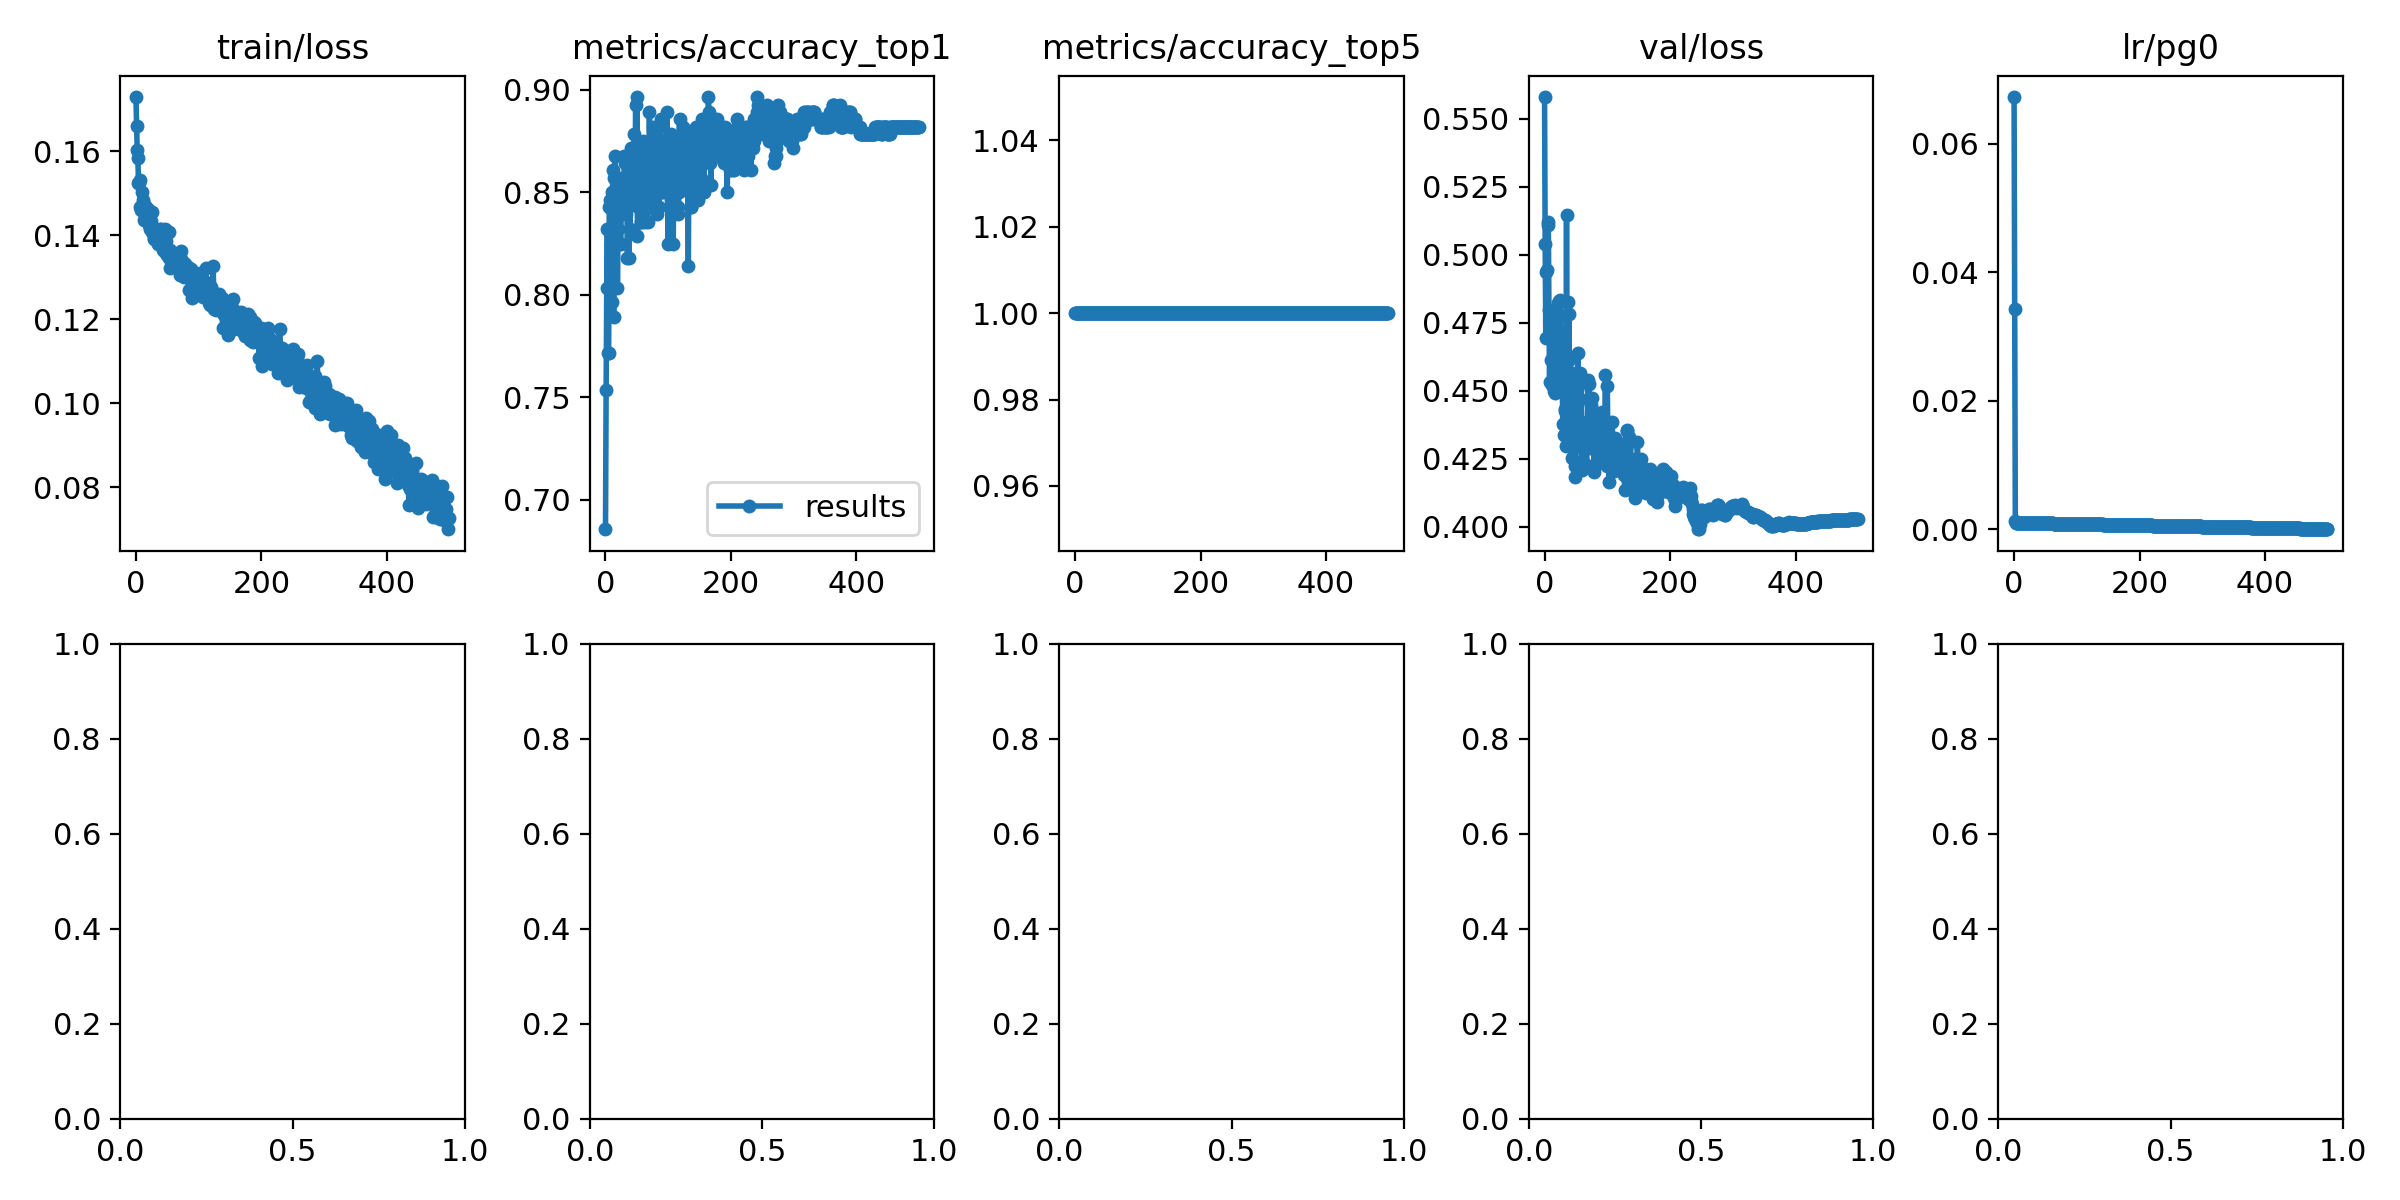

In [66]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/optimizeRA/Adam/results.png', height=800)

AdamW optimizer validation and testing

In [67]:
!yolo task=classify mode=val model=/content/ultralytics/Optimizers/AdamW/best.pt data=/content/ultralytics/autism/  conf=0.5 plots= True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100% 18/18 [00:00<00:00, 21.21it/s]
                   all      0.896          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/ultralytics/runs/classify/val3


In [71]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/AdamW/best.pt conf=0.25 source=./autism/test/Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Autistic/001.jpg: 128x128 Autistic 0.98, Non_Autistic 0.02, 3.1ms
image 2/140 /content/ultralytics/autism/test/Autistic/002.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.8ms
image 3/140 /content/ultralytics/autism/test/Autistic/003.jpg: 128x128 Autistic 0.98, Non_Autistic 0.02, 4.8ms
image 4/140 /content/ultralytics/autism/test/Autistic/004.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 3.7ms
image 5/140 /content/ultralytics/autism/test/Autistic/005.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.4ms
image 6/140 /content/ultralytics/autism/test/Autistic/006.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 3.2ms
image 7/140 /content/ultralytics/autism/test/Autistic/007.jpg: 128x128 Autistic 0.98, Non_Autistic 0.02, 3.1ms
image 8/140 /content/ultralytics/autism/test/Autist

In [70]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/AdamW/best.pt conf=0.25 source=./autism/test/Non_Autistic/  plots=True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Non_Autistic/001.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 4.8ms
image 2/140 /content/ultralytics/autism/test/Non_Autistic/002.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 4.7ms
image 3/140 /content/ultralytics/autism/test/Non_Autistic/003.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.2ms
image 4/140 /content/ultralytics/autism/test/Non_Autistic/004.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.1ms
image 5/140 /content/ultralytics/autism/test/Non_Autistic/005.jpg: 128x128 Non_Autistic 0.88, Autistic 0.12, 4.1ms
image 6/140 /content/ultralytics/autism/test/Non_Autistic/006.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 3.1ms
image 7/140 /content/ultralytics/autism/test/Non_Autistic/007.jpg: 128x128 Non_Autistic 0.96, Autistic 0.04, 3.2ms
image 8/140 /content/ul

In [73]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/AdamW/best.pt conf=0.25 source=./autism/valid/Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Autistic/01.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 4.4ms
image 2/40 /content/ultralytics/autism/valid/Autistic/02.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 4.8ms
image 3/40 /content/ultralytics/autism/valid/Autistic/03.jpg: 128x128 Autistic 0.98, Non_Autistic 0.02, 4.9ms
image 4/40 /content/ultralytics/autism/valid/Autistic/04.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 3.2ms
image 5/40 /content/ultralytics/autism/valid/Autistic/05.jpg: 128x128 Autistic 1.00, Non_Autistic 0.00, 3.2ms
image 6/40 /content/ultralytics/autism/valid/Autistic/06.jpg: 128x128 Autistic 0.99, Non_Autistic 0.01, 3.1ms
image 7/40 /content/ultralytics/autism/valid/Autistic/07.jpg: 128x128 Autistic 0.98, Non_Autistic 0.02, 3.1ms
image 8/40 /content/ultralytics/autism/valid/Autistic/08.j

In [75]:
!yolo task=classify mode=predict model=/content/ultralytics/Optimizers/AdamW/best.pt conf=0.25 source=./autism/valid/Non_Autistic/  plots = True save_txt = True save = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Non_Autistic/01.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 3.3ms
image 2/40 /content/ultralytics/autism/valid/Non_Autistic/02.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 4.8ms
image 3/40 /content/ultralytics/autism/valid/Non_Autistic/03.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.0ms
image 4/40 /content/ultralytics/autism/valid/Non_Autistic/04.jpg: 128x128 Non_Autistic 1.00, Autistic 0.00, 3.3ms
image 5/40 /content/ultralytics/autism/valid/Non_Autistic/05.jpg: 128x128 Non_Autistic 0.88, Autistic 0.12, 3.2ms
image 6/40 /content/ultralytics/autism/valid/Non_Autistic/06.jpg: 128x128 Non_Autistic 0.99, Autistic 0.01, 3.0ms
image 7/40 /content/ultralytics/autism/valid/Non_Autistic/07.jpg: 128x128 Non_Autistic 0.96, Autistic 0.04, 3.1ms
image 8/40 /content/ultralytic

In [76]:
# Ultralytics YOLO 🚀, GPL-3.0 license

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

from ultralytics.yolo.utils import LOGGER, TryExcept, threaded

# from .checks import check_font, check_version, is_ascii
# from .files import increment_path
# from .ops import clip_coords, scale_image, xywh2xyxy, xyxy2xywh

matplotlib.rc('font', **{'size': 11})
matplotlib.use('Agg')  # for writing to files only


class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'


class Annotator:
    # YOLOv8 Annotator for train/val mosaics and jpgs and detect/hub inference annotations
    def __init__(self, im, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        non_ascii = not is_ascii(example)  # non-latin labels, i.e. asian, arabic, cyrillic
        self.pil = pil or non_ascii
        if self.pil:  # use PIL
            self.pil_9_2_0_check = check_version(pil_version, '9.2.0')  # deprecation check
            self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
            self.draw = ImageDraw.Draw(self.im)
            try:
                font = check_font('Arial.Unicode.ttf' if non_ascii else font)
                size = font_size or max(round(sum(self.im.size) / 2 * 0.035), 12)
                self.font = ImageFont.truetype(str(font), size)
            except Exception:
                self.font = ImageFont.load_default()
        else:  # use cv2
            self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        if isinstance(box, torch.Tensor):
            box = box.tolist()
        if self.pil or not is_ascii(label):
            self.draw.rectangle(box, width=self.lw, outline=color)  # box
            if label:
                if self.pil_9_2_0_check:
                    _, _, w, h = self.font.getbbox(label)  # text width, height (New)
                else:
                    w, h = self.font.getsize(label)  # text width, height (Old, deprecated in 9.2.0)
                outside = box[1] - h >= 0  # label fits outside box
                self.draw.rectangle(
                    (box[0], box[1] - h if outside else box[1], box[0] + w + 1,
                     box[1] + 1 if outside else box[1] + h + 1),
                    fill=color,
                )
                # self.draw.text((box[0], box[1]), label, fill=txt_color, font=self.font, anchor='ls')  # for PIL>8.0
                self.draw.text((box[0], box[1] - h if outside else box[1]), label, fill=txt_color, font=self.font)
        else:  # cv2
            p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
            cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
            if label:
                tf = max(self.lw - 1, 1)  # font thickness
                w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
                outside = p1[1] - h >= 3
                p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
                cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(self.im,
                            label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                            0,
                            self.lw / 3,
                            txt_color,
                            thickness=tf,
                            lineType=cv2.LINE_AA)

    def masks(self, masks, colors, im_gpu, alpha=0.5, retina_masks=False):
        """Plot masks at once.
        Args:
            masks (tensor): predicted masks on cuda, shape: [n, h, w]
            colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
            im_gpu (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
            alpha (float): mask transparency: 0.0 fully transparent, 1.0 opaque
        """
        if self.pil:
            # convert to numpy first
            self.im = np.asarray(self.im).copy()
        if len(masks) == 0:
            self.im[:] = im_gpu.permute(1, 2, 0).contiguous().cpu().numpy() * 255
        if im_gpu.device != masks.device:
            im_gpu = im_gpu.to(masks.device)
        colors = torch.tensor(colors, device=masks.device, dtype=torch.float32) / 255.0
        colors = colors[:, None, None]  # shape(n,1,1,3)
        masks = masks.unsqueeze(3)  # shape(n,h,w,1)
        masks_color = masks * (colors * alpha)  # shape(n,h,w,3)

        inv_alph_masks = (1 - masks * alpha).cumprod(0)  # shape(n,h,w,1)
        mcs = (masks_color * inv_alph_masks).sum(0) * 2  # mask color summand shape(n,h,w,3)

        im_gpu = im_gpu.flip(dims=[0])  # flip channel
        im_gpu = im_gpu.permute(1, 2, 0).contiguous()  # shape(h,w,3)
        im_gpu = im_gpu * inv_alph_masks[-1] + mcs
        im_mask = (im_gpu * 255)
        im_mask_np = im_mask.byte().cpu().numpy()
        self.im[:] = im_mask_np if retina_masks else scale_image(im_gpu.shape, im_mask_np, self.im.shape)
        if self.pil:
            # convert im back to PIL and update draw
            self.fromarray(self.im)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255), anchor='top'):
        # Add text to image (PIL-only)
        if anchor == 'bottom':  # start y from font bottom
            w, h = self.font.getsize(text)  # text width, height
            xy[1] += 1 - h
        if self.pil:
            self.draw.text(xy, text, fill=txt_color, font=self.font)
        else:
            tf = max(self.lw - 1, 1)  # font thickness
            cv2.putText(self.im, text, xy, 0, self.lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

    def fromarray(self, im):
        # Update self.im from a numpy array
        self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
        self.draw = ImageDraw.Draw(self.im)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)


@TryExcept()  # known issue https://github.com/ultralytics/yolov5/issues/5395
def plot_labels(boxes, cls, names=(), save_dir=Path('')):
    import pandas as pd
    import seaborn as sn

    # plot dataset labels
    LOGGER.info(f"Plotting labels to {save_dir / 'labels.jpg'}... ")
    b = boxes.transpose()  # classes, boxes
    nc = int(cls.max() + 1)  # number of classes
    x = pd.DataFrame(b.transpose(), columns=['x', 'y', 'width', 'height'])

    # seaborn correlogram
    sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))
    plt.savefig(save_dir / 'labels_correlogram.jpg', dpi=200)
    plt.close()

    # matplotlib labels
    matplotlib.use('svg')  # faster
    ax = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)[1].ravel()
    y = ax[0].hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
    with contextlib.suppress(Exception):  # color histogram bars by class
        [y[2].patches[i].set_color([x / 255 for x in colors(i)]) for i in range(nc)]  # known issue #3195
    ax[0].set_ylabel('instances')
    if 0 < len(names) < 30:
        ax[0].set_xticks(range(len(names)))
        ax[0].set_xticklabels(list(names.values()), rotation=90, fontsize=10)
    else:
        ax[0].set_xlabel('classes')
    sn.histplot(x, x='x', y='y', ax=ax[2], bins=50, pmax=0.9)
    sn.histplot(x, x='width', y='height', ax=ax[3], bins=50, pmax=0.9)

    # rectangles
    boxes[:, 0:2] = 0.5  # center
    boxes = xywh2xyxy(boxes) * 2000
    img = Image.fromarray(np.ones((2000, 2000, 3), dtype=np.uint8) * 255)
    for cls, box in zip(cls[:1000], boxes[:1000]):
        ImageDraw.Draw(img).rectangle(box, width=1, outline=colors(cls))  # plot
    ax[1].imshow(img)
    ax[1].axis('off')

    for a in [0, 1, 2, 3]:
        for s in ['top', 'right', 'left', 'bottom']:
            ax[a].spines[s].set_visible(False)

    plt.savefig(save_dir / 'labels.jpg', dpi=200)
    matplotlib.use('Agg')
    plt.close()


def save_one_box(xyxy, im, file=Path('im.jpg'), gain=1.02, pad=10, square=False, BGR=False, save=True):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels. Save and/or return crop
    b = xyxy2xywh(xyxy.view(-1, 4))  # boxes
    if square:
        b[:, 2:] = b[:, 2:].max(1)[0].unsqueeze(1)  # attempt rectangle to square
    b[:, 2:] = b[:, 2:] * gain + pad  # box wh * gain + pad
    xyxy = xywh2xyxy(b).long()
    clip_coords(xyxy, im.shape)
    crop = im[int(xyxy[0, 1]):int(xyxy[0, 3]), int(xyxy[0, 0]):int(xyxy[0, 2]), ::(1 if BGR else -1)]
    if save:
        file.parent.mkdir(parents=True, exist_ok=True)  # make directory
        f = str(increment_path(file).with_suffix('.jpg'))
        # cv2.imwrite(f, crop)  # save BGR, https://github.com/ultralytics/yolov5/issues/7007 chroma subsampling issue
        Image.fromarray(crop[..., ::-1]).save(f, quality=95, subsampling=0)  # save RGB
    return crop


@threaded
def plot_images(images,
                batch_idx,
                cls,
                bboxes,
                masks=np.zeros(0, dtype=np.uint8),
                paths=None,
                fname='images.jpg',
                names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(cls, torch.Tensor):
        cls = cls.cpu().numpy()
    if isinstance(bboxes, torch.Tensor):
        bboxes = bboxes.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)
    if isinstance(batch_idx, torch.Tensor):
        batch_idx = batch_idx.cpu().numpy()

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(cls) > 0:
            idx = batch_idx == i

            boxes = xywh2xyxy(bboxes[idx, :4]).T
            classes = cls[idx].astype('int')
            labels = bboxes.shape[1] == 4  # labels if no conf column
            conf = None if labels else bboxes[idx, 4]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                c = classes[j]
                color = colors(c)
                c = names[c] if names else c
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{c}' if labels else f'{c} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if idx.shape[0] == masks.shape[0]:  # overlap_masks=False
                    image_masks = masks[idx]
                else:  # overlap_masks=True
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = idx.sum()
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(bool)
                        else:
                            mask = image_masks[j].astype(bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results(file='path/to/results.csv', dir='', segment=False):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    import pandas as pd
    save_dir = Path(file).parent if file else Path(dir)
    if segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()


def output_to_target(output, max_det=300):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf] for plotting
    targets = []
    for i, o in enumerate(output):
        box, conf, cls = o[:max_det, :6].cpu().split((4, 1, 1), 1)
        j = torch.full((conf.shape[0], 1), i)
        targets.append(torch.cat((j, cls, xyxy2xywh(box), conf), 1))
    targets = torch.cat(targets, 0).numpy()
    return targets[:, 0], targets[:, 1], targets[:, 2:]

In [78]:
plot_results('/content/ultralytics/Optimizers/AdamW/results.csv')

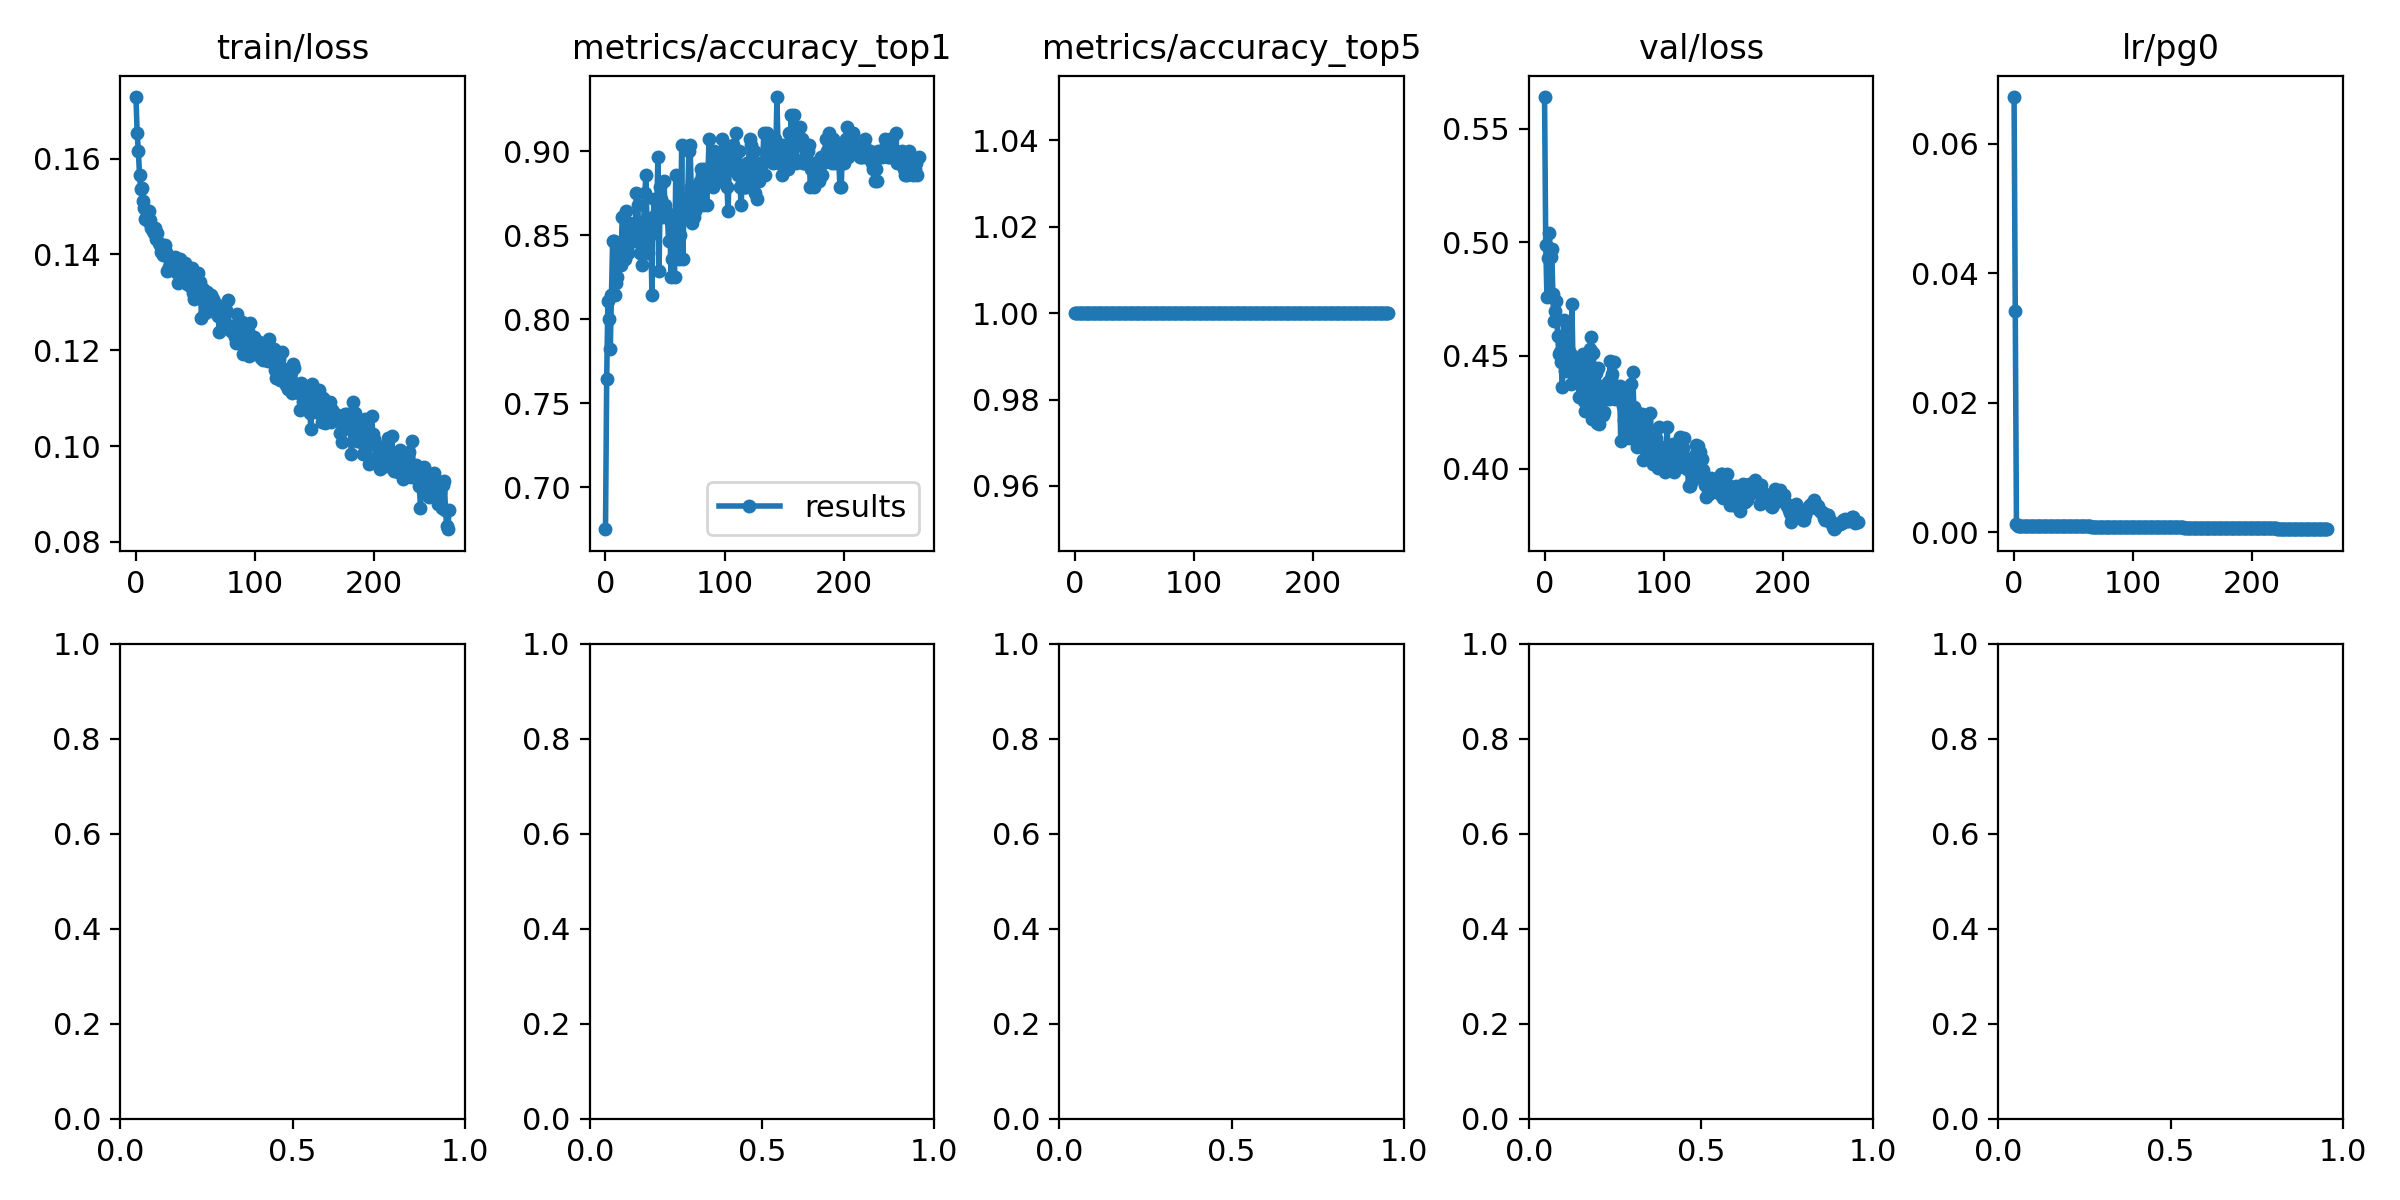

In [79]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/Optimizers/AdamW/results.png', height=800)

RMSprop optimizer validation & testing.

In [80]:
!yolo task=classify mode=val model=/content/ultralytics/optimizeRA/Rmsprop/RMspropbest.pt data=/content/ultralytics/autism/  conf=0.5 plots= True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100% 18/18 [00:00<00:00, 25.16it/s]
                   all      0.504          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/ultralytics/runs/classify/val4


In [81]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Rmsprop/RMspropbest.pt conf=0.25 source=./autism/test/Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Autistic/001.jpg: 128x128 Autistic 0.82, Non_Autistic 0.18, 4.4ms
image 2/140 /content/ultralytics/autism/test/Autistic/002.jpg: 128x128 Autistic 0.83, Non_Autistic 0.17, 4.1ms
image 3/140 /content/ultralytics/autism/test/Autistic/003.jpg: 128x128 Autistic 0.83, Non_Autistic 0.17, 4.2ms
image 4/140 /content/ultralytics/autism/test/Autistic/004.jpg: 128x128 Autistic 0.79, Non_Autistic 0.21, 6.3ms
image 5/140 /content/ultralytics/autism/test/Autistic/005.jpg: 128x128 Autistic 0.82, Non_Autistic 0.18, 4.2ms
image 6/140 /content/ultralytics/autism/test/Autistic/006.jpg: 128x128 Autistic 0.84, Non_Autistic 0.16, 4.0ms
image 7/140 /content/ultralytics/autism/test/Autistic/007.jpg: 128x128 Autistic 0.81, Non_Autistic 0.19, 4.2ms
image 8/140 /content/ultralytics/autism/test/Autist

In [82]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Rmsprop/RMspropbest.pt conf=0.25 source=./autism/test/Non_Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/ultralytics/autism/test/Non_Autistic/001.jpg: 128x128 Autistic 0.58, Non_Autistic 0.42, 3.2ms
image 2/140 /content/ultralytics/autism/test/Non_Autistic/002.jpg: 128x128 Autistic 0.68, Non_Autistic 0.32, 3.2ms
image 3/140 /content/ultralytics/autism/test/Non_Autistic/003.jpg: 128x128 Autistic 0.57, Non_Autistic 0.43, 3.1ms
image 4/140 /content/ultralytics/autism/test/Non_Autistic/004.jpg: 128x128 Autistic 0.60, Non_Autistic 0.40, 3.2ms
image 5/140 /content/ultralytics/autism/test/Non_Autistic/005.jpg: 128x128 Autistic 0.72, Non_Autistic 0.28, 4.8ms
image 6/140 /content/ultralytics/autism/test/Non_Autistic/006.jpg: 128x128 Autistic 0.63, Non_Autistic 0.37, 3.4ms
image 7/140 /content/ultralytics/autism/test/Non_Autistic/007.jpg: 128x128 Autistic 0.76, Non_Autistic 0.24, 2.9ms
image 8/140 /content/ul

In [83]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Rmsprop/RMspropbest.pt conf=0.25 source=./autism/valid/Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Autistic/01.jpg: 128x128 Autistic 0.78, Non_Autistic 0.22, 4.5ms
image 2/40 /content/ultralytics/autism/valid/Autistic/02.jpg: 128x128 Autistic 0.83, Non_Autistic 0.17, 5.0ms
image 3/40 /content/ultralytics/autism/valid/Autistic/03.jpg: 128x128 Autistic 0.83, Non_Autistic 0.17, 4.3ms
image 4/40 /content/ultralytics/autism/valid/Autistic/04.jpg: 128x128 Autistic 0.79, Non_Autistic 0.21, 3.0ms
image 5/40 /content/ultralytics/autism/valid/Autistic/05.jpg: 128x128 Autistic 0.82, Non_Autistic 0.18, 3.5ms
image 6/40 /content/ultralytics/autism/valid/Autistic/06.jpg: 128x128 Autistic 0.84, Non_Autistic 0.16, 3.0ms
image 7/40 /content/ultralytics/autism/valid/Autistic/07.jpg: 128x128 Autistic 0.81, Non_Autistic 0.19, 3.0ms
image 8/40 /content/ultralytics/autism/valid/Autistic/08.j

In [84]:
!yolo task=classify mode=predict model=/content/ultralytics/optimizeRA/Rmsprop/RMspropbest.pt conf=0.25 source=./autism/valid/Non_Autistic/  plots = True save_txt = True

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/ultralytics/autism/valid/Non_Autistic/01.jpg: 128x128 Autistic 0.58, Non_Autistic 0.42, 4.2ms
image 2/40 /content/ultralytics/autism/valid/Non_Autistic/02.jpg: 128x128 Autistic 0.68, Non_Autistic 0.32, 4.8ms
image 3/40 /content/ultralytics/autism/valid/Non_Autistic/03.jpg: 128x128 Autistic 0.57, Non_Autistic 0.43, 4.6ms
image 4/40 /content/ultralytics/autism/valid/Non_Autistic/04.jpg: 128x128 Autistic 0.60, Non_Autistic 0.40, 3.3ms
image 5/40 /content/ultralytics/autism/valid/Non_Autistic/05.jpg: 128x128 Autistic 0.72, Non_Autistic 0.28, 3.1ms
image 6/40 /content/ultralytics/autism/valid/Non_Autistic/06.jpg: 128x128 Autistic 0.63, Non_Autistic 0.37, 3.0ms
image 7/40 /content/ultralytics/autism/valid/Non_Autistic/07.jpg: 128x128 Autistic 0.76, Non_Autistic 0.24, 3.1ms
image 8/40 /content/ultralytic

In [85]:
# Ultralytics YOLO 🚀, GPL-3.0 license

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

from ultralytics.yolo.utils import LOGGER, TryExcept, threaded

# from .checks import check_font, check_version, is_ascii
# from .files import increment_path
# from .ops import clip_coords, scale_image, xywh2xyxy, xyxy2xywh

matplotlib.rc('font', **{'size': 11})
matplotlib.use('Agg')  # for writing to files only


class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'


class Annotator:
    # YOLOv8 Annotator for train/val mosaics and jpgs and detect/hub inference annotations
    def __init__(self, im, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        non_ascii = not is_ascii(example)  # non-latin labels, i.e. asian, arabic, cyrillic
        self.pil = pil or non_ascii
        if self.pil:  # use PIL
            self.pil_9_2_0_check = check_version(pil_version, '9.2.0')  # deprecation check
            self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
            self.draw = ImageDraw.Draw(self.im)
            try:
                font = check_font('Arial.Unicode.ttf' if non_ascii else font)
                size = font_size or max(round(sum(self.im.size) / 2 * 0.035), 12)
                self.font = ImageFont.truetype(str(font), size)
            except Exception:
                self.font = ImageFont.load_default()
        else:  # use cv2
            self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        if isinstance(box, torch.Tensor):
            box = box.tolist()
        if self.pil or not is_ascii(label):
            self.draw.rectangle(box, width=self.lw, outline=color)  # box
            if label:
                if self.pil_9_2_0_check:
                    _, _, w, h = self.font.getbbox(label)  # text width, height (New)
                else:
                    w, h = self.font.getsize(label)  # text width, height (Old, deprecated in 9.2.0)
                outside = box[1] - h >= 0  # label fits outside box
                self.draw.rectangle(
                    (box[0], box[1] - h if outside else box[1], box[0] + w + 1,
                     box[1] + 1 if outside else box[1] + h + 1),
                    fill=color,
                )
                # self.draw.text((box[0], box[1]), label, fill=txt_color, font=self.font, anchor='ls')  # for PIL>8.0
                self.draw.text((box[0], box[1] - h if outside else box[1]), label, fill=txt_color, font=self.font)
        else:  # cv2
            p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
            cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
            if label:
                tf = max(self.lw - 1, 1)  # font thickness
                w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
                outside = p1[1] - h >= 3
                p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
                cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(self.im,
                            label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                            0,
                            self.lw / 3,
                            txt_color,
                            thickness=tf,
                            lineType=cv2.LINE_AA)

    def masks(self, masks, colors, im_gpu, alpha=0.5, retina_masks=False):
        """Plot masks at once.
        Args:
            masks (tensor): predicted masks on cuda, shape: [n, h, w]
            colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
            im_gpu (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
            alpha (float): mask transparency: 0.0 fully transparent, 1.0 opaque
        """
        if self.pil:
            # convert to numpy first
            self.im = np.asarray(self.im).copy()
        if len(masks) == 0:
            self.im[:] = im_gpu.permute(1, 2, 0).contiguous().cpu().numpy() * 255
        if im_gpu.device != masks.device:
            im_gpu = im_gpu.to(masks.device)
        colors = torch.tensor(colors, device=masks.device, dtype=torch.float32) / 255.0
        colors = colors[:, None, None]  # shape(n,1,1,3)
        masks = masks.unsqueeze(3)  # shape(n,h,w,1)
        masks_color = masks * (colors * alpha)  # shape(n,h,w,3)

        inv_alph_masks = (1 - masks * alpha).cumprod(0)  # shape(n,h,w,1)
        mcs = (masks_color * inv_alph_masks).sum(0) * 2  # mask color summand shape(n,h,w,3)

        im_gpu = im_gpu.flip(dims=[0])  # flip channel
        im_gpu = im_gpu.permute(1, 2, 0).contiguous()  # shape(h,w,3)
        im_gpu = im_gpu * inv_alph_masks[-1] + mcs
        im_mask = (im_gpu * 255)
        im_mask_np = im_mask.byte().cpu().numpy()
        self.im[:] = im_mask_np if retina_masks else scale_image(im_gpu.shape, im_mask_np, self.im.shape)
        if self.pil:
            # convert im back to PIL and update draw
            self.fromarray(self.im)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255), anchor='top'):
        # Add text to image (PIL-only)
        if anchor == 'bottom':  # start y from font bottom
            w, h = self.font.getsize(text)  # text width, height
            xy[1] += 1 - h
        if self.pil:
            self.draw.text(xy, text, fill=txt_color, font=self.font)
        else:
            tf = max(self.lw - 1, 1)  # font thickness
            cv2.putText(self.im, text, xy, 0, self.lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

    def fromarray(self, im):
        # Update self.im from a numpy array
        self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
        self.draw = ImageDraw.Draw(self.im)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)


@TryExcept()  # known issue https://github.com/ultralytics/yolov5/issues/5395
def plot_labels(boxes, cls, names=(), save_dir=Path('')):
    import pandas as pd
    import seaborn as sn

    # plot dataset labels
    LOGGER.info(f"Plotting labels to {save_dir / 'labels.jpg'}... ")
    b = boxes.transpose()  # classes, boxes
    nc = int(cls.max() + 1)  # number of classes
    x = pd.DataFrame(b.transpose(), columns=['x', 'y', 'width', 'height'])

    # seaborn correlogram
    sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))
    plt.savefig(save_dir / 'labels_correlogram.jpg', dpi=200)
    plt.close()

    # matplotlib labels
    matplotlib.use('svg')  # faster
    ax = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)[1].ravel()
    y = ax[0].hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
    with contextlib.suppress(Exception):  # color histogram bars by class
        [y[2].patches[i].set_color([x / 255 for x in colors(i)]) for i in range(nc)]  # known issue #3195
    ax[0].set_ylabel('instances')
    if 0 < len(names) < 30:
        ax[0].set_xticks(range(len(names)))
        ax[0].set_xticklabels(list(names.values()), rotation=90, fontsize=10)
    else:
        ax[0].set_xlabel('classes')
    sn.histplot(x, x='x', y='y', ax=ax[2], bins=50, pmax=0.9)
    sn.histplot(x, x='width', y='height', ax=ax[3], bins=50, pmax=0.9)

    # rectangles
    boxes[:, 0:2] = 0.5  # center
    boxes = xywh2xyxy(boxes) * 2000
    img = Image.fromarray(np.ones((2000, 2000, 3), dtype=np.uint8) * 255)
    for cls, box in zip(cls[:1000], boxes[:1000]):
        ImageDraw.Draw(img).rectangle(box, width=1, outline=colors(cls))  # plot
    ax[1].imshow(img)
    ax[1].axis('off')

    for a in [0, 1, 2, 3]:
        for s in ['top', 'right', 'left', 'bottom']:
            ax[a].spines[s].set_visible(False)

    plt.savefig(save_dir / 'labels.jpg', dpi=200)
    matplotlib.use('Agg')
    plt.close()


def save_one_box(xyxy, im, file=Path('im.jpg'), gain=1.02, pad=10, square=False, BGR=False, save=True):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels. Save and/or return crop
    b = xyxy2xywh(xyxy.view(-1, 4))  # boxes
    if square:
        b[:, 2:] = b[:, 2:].max(1)[0].unsqueeze(1)  # attempt rectangle to square
    b[:, 2:] = b[:, 2:] * gain + pad  # box wh * gain + pad
    xyxy = xywh2xyxy(b).long()
    clip_coords(xyxy, im.shape)
    crop = im[int(xyxy[0, 1]):int(xyxy[0, 3]), int(xyxy[0, 0]):int(xyxy[0, 2]), ::(1 if BGR else -1)]
    if save:
        file.parent.mkdir(parents=True, exist_ok=True)  # make directory
        f = str(increment_path(file).with_suffix('.jpg'))
        # cv2.imwrite(f, crop)  # save BGR, https://github.com/ultralytics/yolov5/issues/7007 chroma subsampling issue
        Image.fromarray(crop[..., ::-1]).save(f, quality=95, subsampling=0)  # save RGB
    return crop


@threaded
def plot_images(images,
                batch_idx,
                cls,
                bboxes,
                masks=np.zeros(0, dtype=np.uint8),
                paths=None,
                fname='images.jpg',
                names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(cls, torch.Tensor):
        cls = cls.cpu().numpy()
    if isinstance(bboxes, torch.Tensor):
        bboxes = bboxes.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)
    if isinstance(batch_idx, torch.Tensor):
        batch_idx = batch_idx.cpu().numpy()

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(cls) > 0:
            idx = batch_idx == i

            boxes = xywh2xyxy(bboxes[idx, :4]).T
            classes = cls[idx].astype('int')
            labels = bboxes.shape[1] == 4  # labels if no conf column
            conf = None if labels else bboxes[idx, 4]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                c = classes[j]
                color = colors(c)
                c = names[c] if names else c
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{c}' if labels else f'{c} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if idx.shape[0] == masks.shape[0]:  # overlap_masks=False
                    image_masks = masks[idx]
                else:  # overlap_masks=True
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = idx.sum()
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(bool)
                        else:
                            mask = image_masks[j].astype(bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results(file='path/to/results.csv', dir='', segment=False):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    import pandas as pd
    save_dir = Path(file).parent if file else Path(dir)
    if segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()


def output_to_target(output, max_det=300):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf] for plotting
    targets = []
    for i, o in enumerate(output):
        box, conf, cls = o[:max_det, :6].cpu().split((4, 1, 1), 1)
        j = torch.full((conf.shape[0], 1), i)
        targets.append(torch.cat((j, cls, xyxy2xywh(box), conf), 1))
    targets = torch.cat(targets, 0).numpy()
    return targets[:, 0], targets[:, 1], targets[:, 2:]

In [86]:
plot_results('/content/ultralytics/optimizeRA/Rmsprop/results.csv')
     

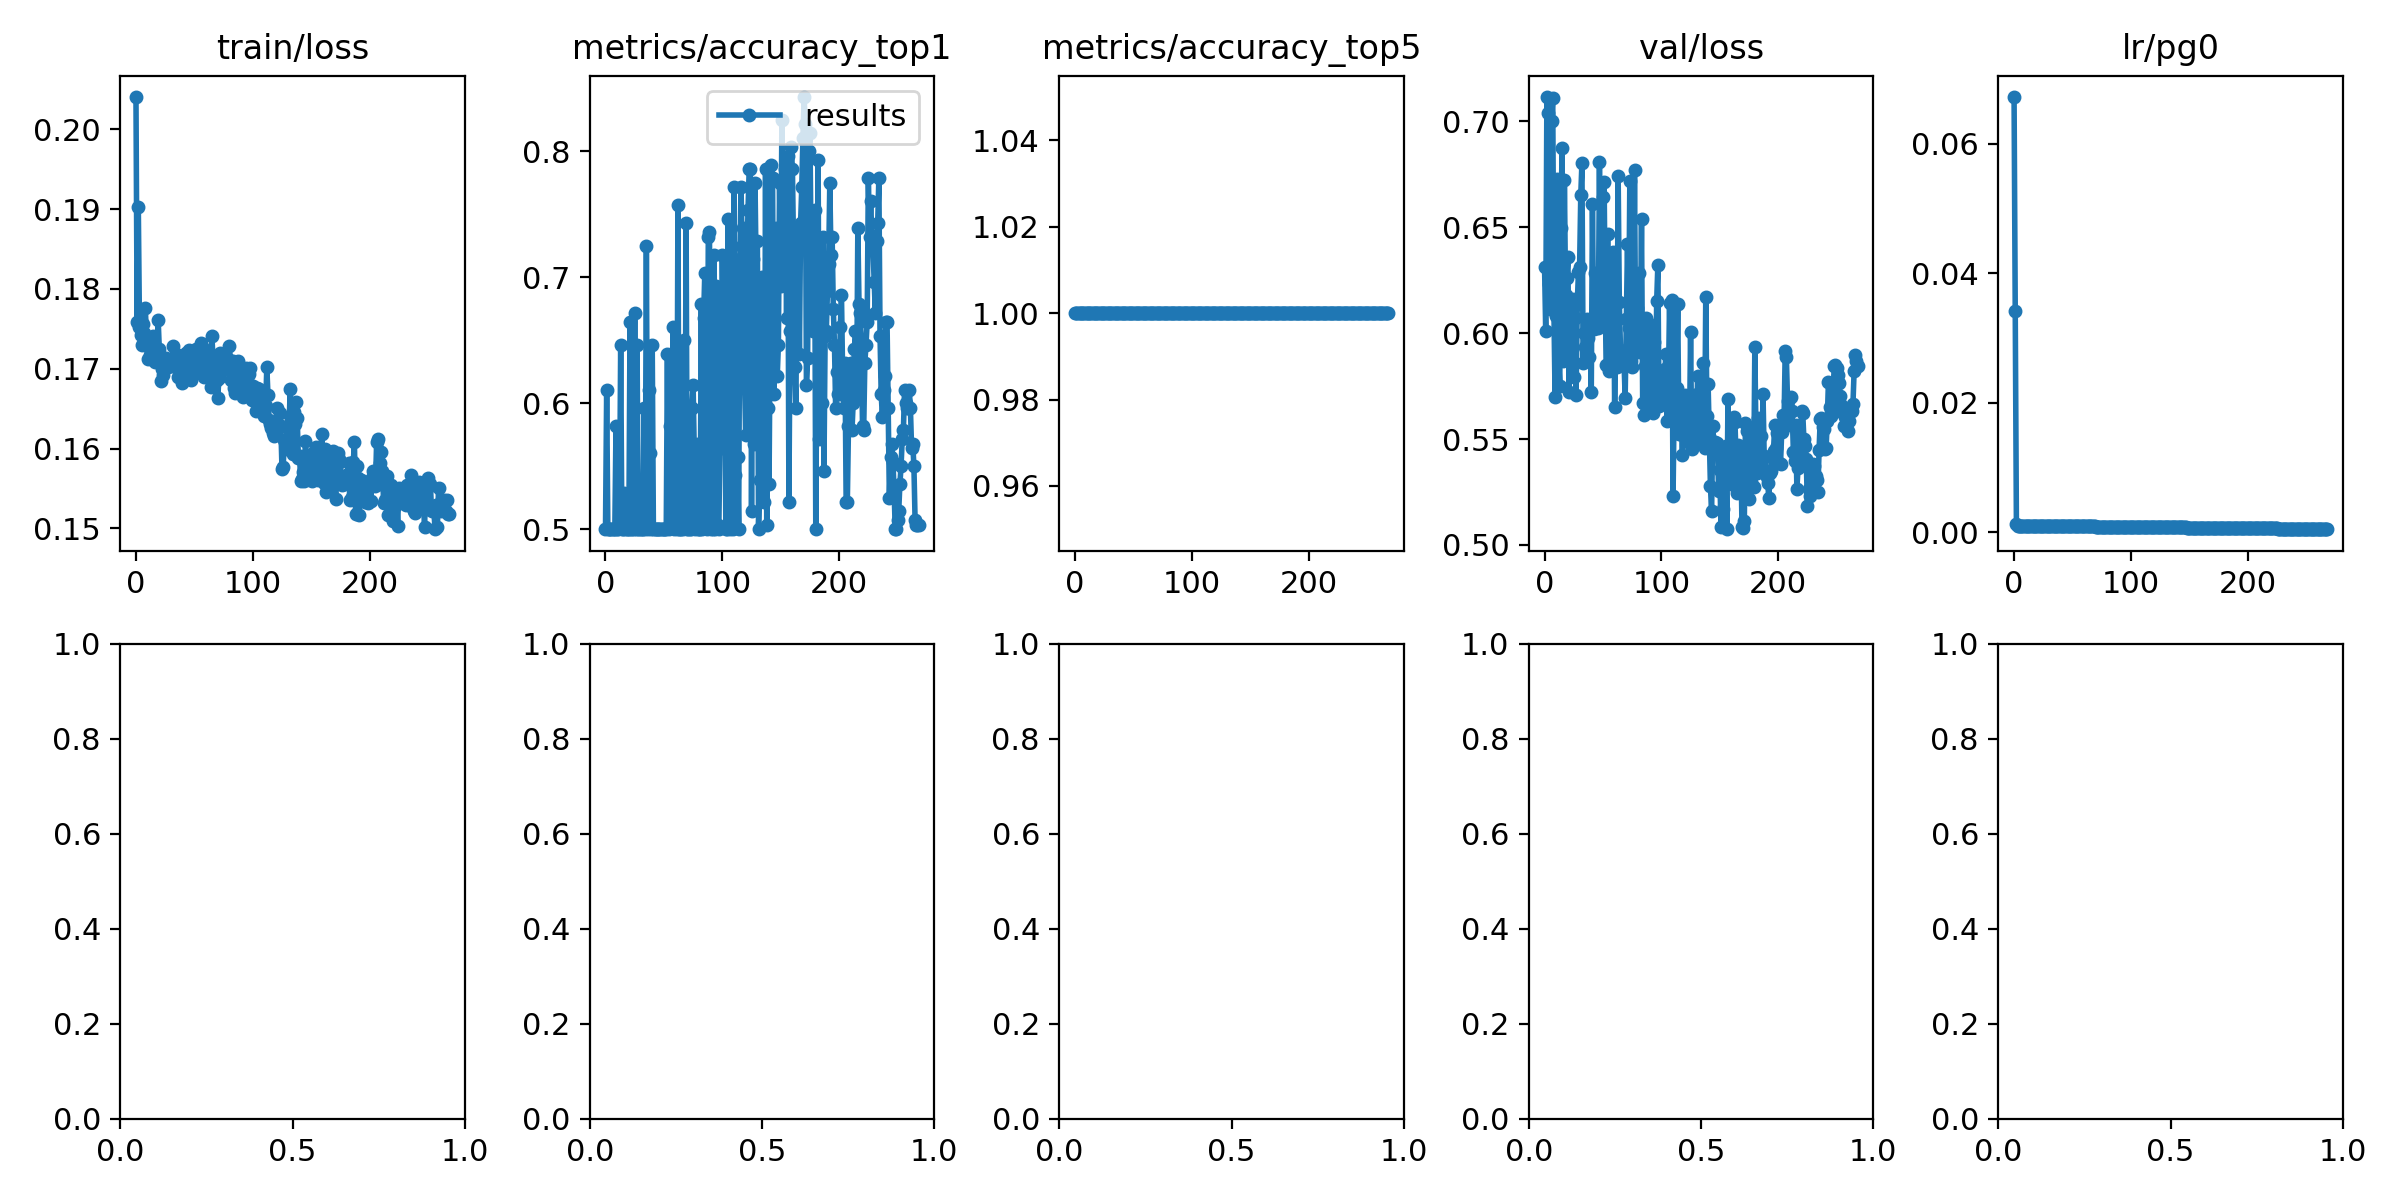

In [88]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/optimizeRA/Rmsprop/results.png', height=800)

In [ ]:
### solving out of bound error !!! work in progress confusion matrix and some data graphs